# Chameleons
In einem Zoo leben sieben Chamäleons in einem grossen Terrarium. Und zwar zwei rote, vier gelbe und ein violettes.
Diese Chamäleons haben eine spezielle Eigenschaft: Immer, wenn sich zwei Chamäleons verschiedener Farbe begegnen, nehmen beide die dritte Farbe an.
Wenn sich also ein rotes und ein gelbes Chamäleon begegnen, werden beide violett.

Frage: Kann es passieren, dass irgendwann alle Chamäleons die gleiche Farbe haben?

- Nein, das kann nicht passieren.
- Ja, das kann sein. Alle Chamäleons werden rot.
- Ja, das kann sein. Alle Chamäleons werden gelb.
- Ja, das kann sein. Alle Chamäleons werden violett.

## Mapping to Graph
The above question is represented as graph and solved with `networkx`

### States are Nodes
Are represented as tripples $(\#red, \#yellow, \#purple)$ e.g. $(2, 4, 1)$

### Dynamics generates Edges
On tripples with all entries nonzero, transitions to another state are possible by adding $(-1, -1, 2)$ or a permutation thereof.
In tripples with one zero entry only one transition is possible, e.g. $(3, 0, 4) + (-1, 2, -1) \mapsto (2, 2, 3)$.
Tripples with two zeros are nonochrome and have no transitions

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


def build_graph(n_cham):
    "Build a DiGrapf for n_cham chameleons"
    graph = nx.DiGraph()
    
    # nodes:
    graph.add_nodes_from((i, j, n_cham-i-j) for i in range(n_cham+1) for j in range(n_cham+1-i))
    # edges:
    for i, j, k in graph.nodes:
        if i > 0 and j > 0:
            graph.add_edge((i,j,k), (i-1,j-1,k+2))
        if i > 0 and k > 0:
            graph.add_edge((i,j,k), (i-1,j+2,k-1))
        if j > 0 and k > 0:
            graph.add_edge((i,j,k), (i+2,j-1,k-1))
    return graph

3

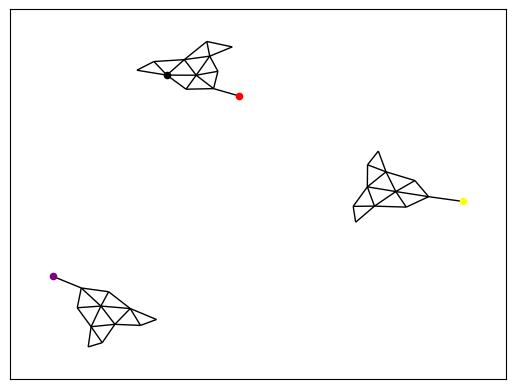

In [6]:
def draw_cham(graph, init=None):
    "Draw the chameleon dynamics graph"
    pos = nx.spring_layout(graph.to_undirected(), seed=99)
    options = {'node_size': 20}

    # nodes:
    #nx.draw_networkx_nodes(graph, pos, **options)
    for i,j in [
        ((n_cham,0,0), 'red'),
        ((0,n_cham,0), 'yellow'),
        ((0,0,n_cham), 'purple')
        ]:
        nx.draw_networkx_nodes(graph, pos, nodelist=[i], node_color=j, **options)

    # edges:
    nx.draw_networkx_edges(graph.to_undirected(), pos)

    if init:
        nx.draw_networkx_nodes(graph, pos, nodelist=[init], node_color='black', **options)


# example:
n_cham = 7
init7 = (2,4,1)

graph7 = build_graph(n_cham)
draw_cham(graph7, init7)
nx.number_weakly_connected_components(graph7)